In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:

df=pd.read_csv('data.csv',encoding='latin-1')
x=df.iloc[:,:-1].values 
y=df.iloc[:,-1].values 


In [4]:
df.head()

,ï»¿,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,â¬226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,â¬127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,â¬228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,â¬138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,â¬196.4M


In [5]:
df.shape

(18207, 89)

In [6]:
df.isnull()

,ï»¿,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

ï»¿                  0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [8]:
df.isnull().sum().sum()

76984

Null values


In [9]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
threshold = 50
columns_to_delete = missing_percentage[missing_percentage > threshold].index
df = df.drop(columns=columns_to_delete)


In [10]:
df.shape

(18207, 88)

In [11]:
df.drop_duplicates()

,ï»¿,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,â¬226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,â¬127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,â¬228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,â¬138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,â¬196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,â¬143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,â¬113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,â¬165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,â¬143K


In [12]:
df_cleaned = df.dropna()


In [13]:
df_filled = df.fillna(df.mode().iloc[0])


In [14]:
df.shape

(18207, 88)

In [15]:
df['Position'].fillna("Unknown", inplace=True)

df['Attacker'] = df['Position'].apply(lambda x: 1 if 'F' in x else 0)
df['Midfielder'] = df['Position'].apply(lambda x: 1 if 'M' in x else 0)
df['Defender'] = df['Position'].apply(lambda x: 1 if 'B' in x else 0)
df['Goalkeeper'] = df['Position'].apply(lambda x: 1 if 'GK' in x else 0)


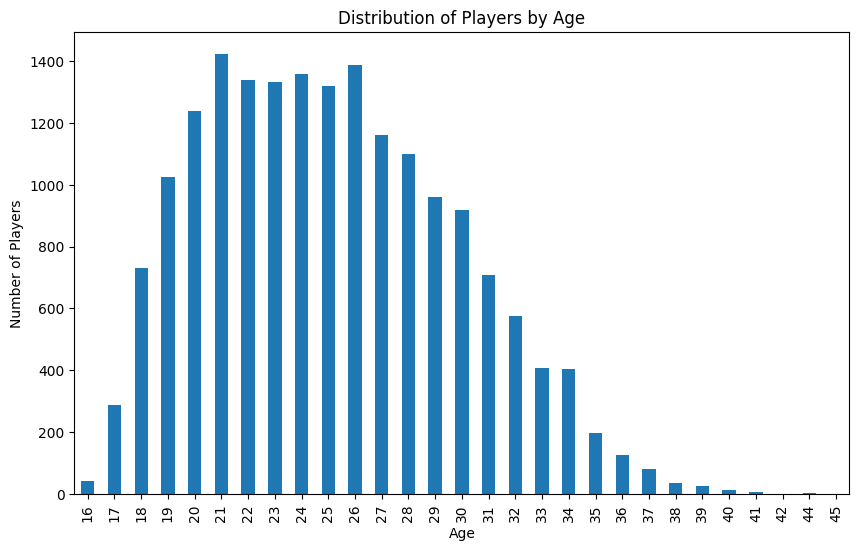

In [16]:
year_counts = df['Age'].value_counts().sort_index()

year_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Distribution of Players by Age')
plt.show()


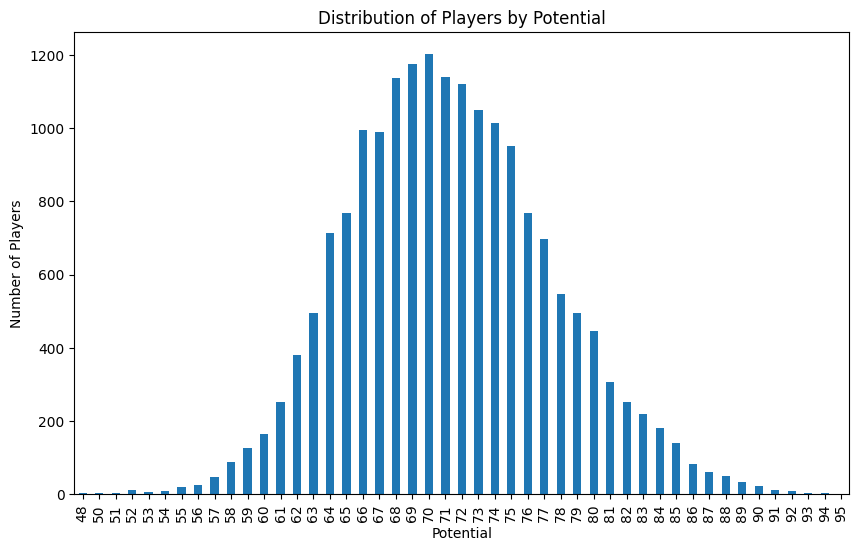

In [17]:
year_counts = df['Potential'].value_counts().sort_index()

year_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Potential')
plt.ylabel('Number of Players')
plt.title('Distribution of Players by Potential')
plt.show()


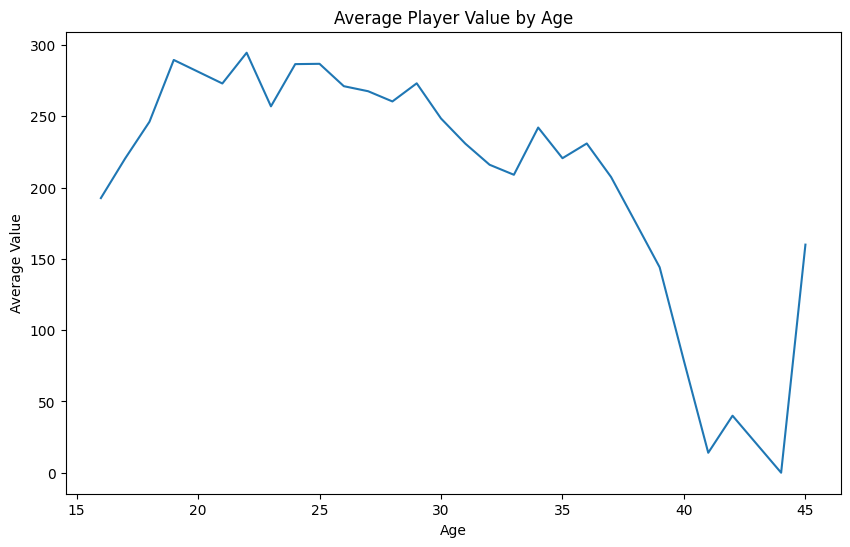

In [18]:
df['Value'] = df['Value'].str.replace('[^0-9.]', '', regex=True).astype(float)

plt.figure(figsize=(10, 6))
df.groupby('Age')['Value'].mean().plot(kind='line')
plt.title('Average Player Value by Age')
plt.xlabel('Age')
plt.ylabel('Average Value')
plt.show()


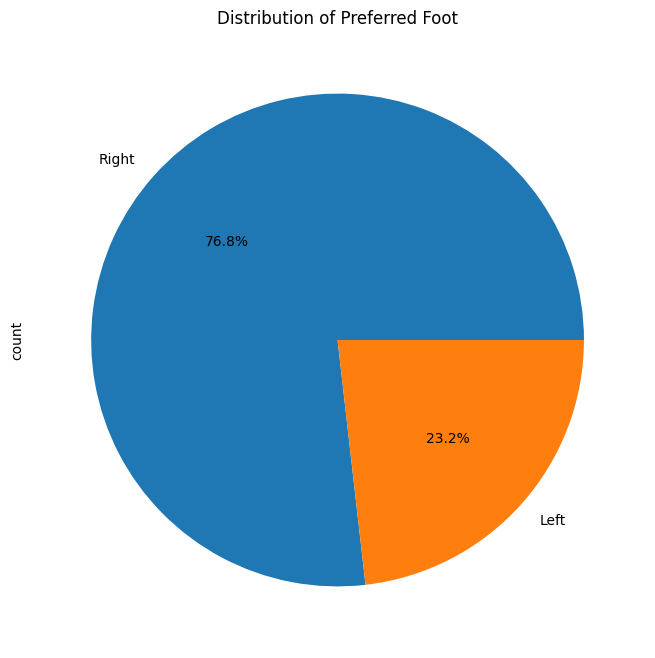

In [19]:
plt.figure(figsize=(8, 8))
df['Preferred Foot'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Preferred Foot')
plt.show()


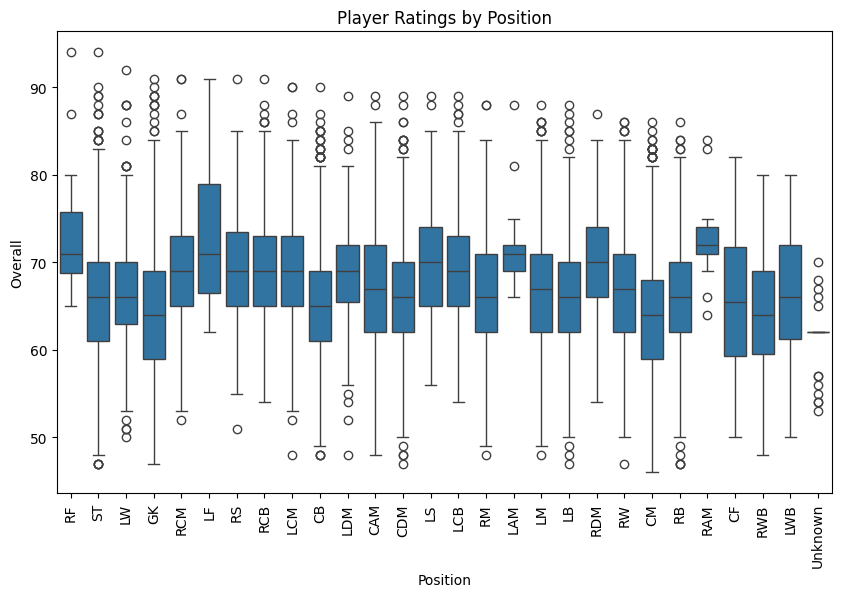

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Position', y='Overall', data=df)
plt.title('Player Ratings by Position')
plt.xticks(rotation=90)
plt.show()


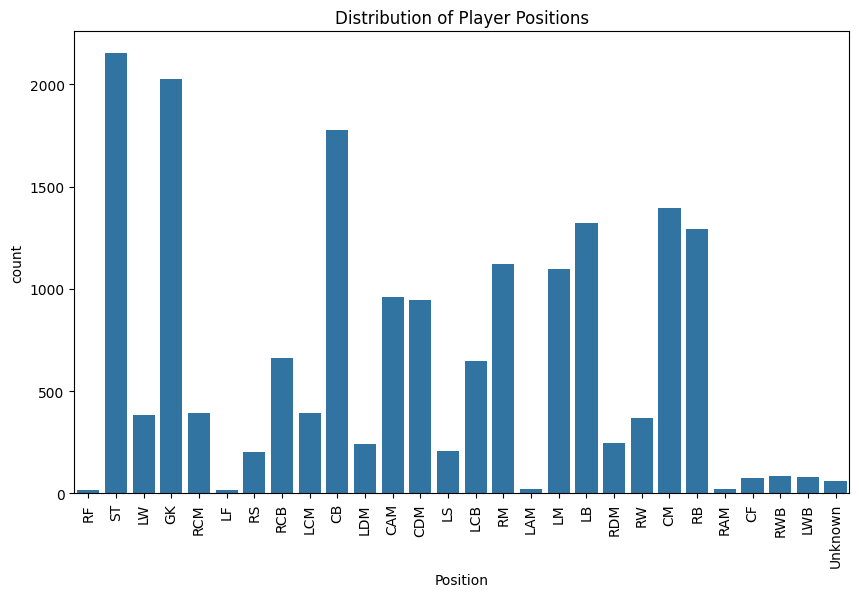

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Position', data=df)
plt.title('Distribution of Player Positions')
plt.xticks(rotation=90)
plt.show()


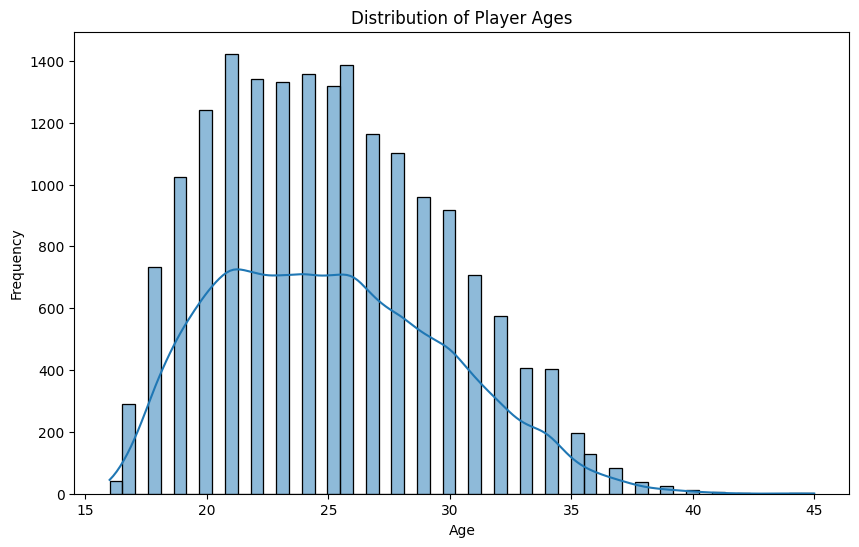

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


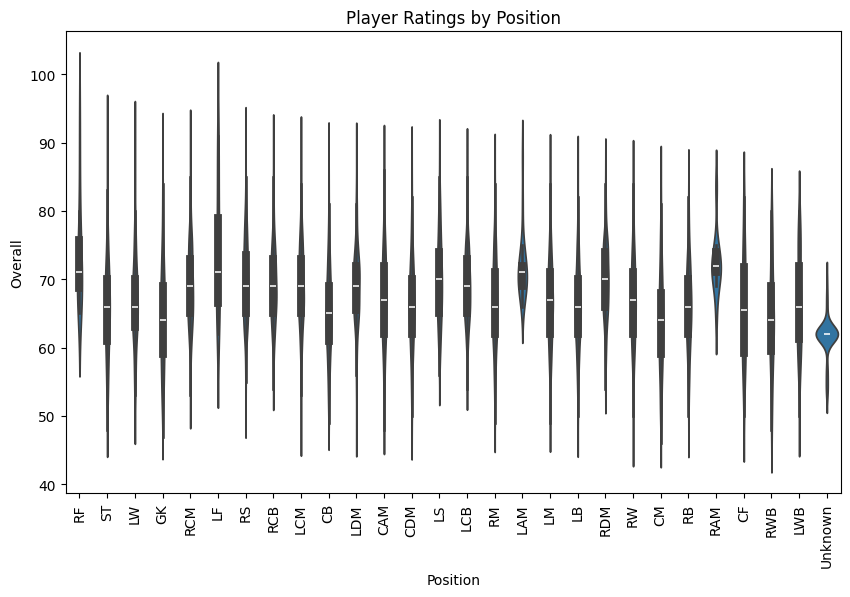

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Position', y='Overall', data=df)
plt.title('Player Ratings by Position')
plt.xticks(rotation=90)
plt.show()


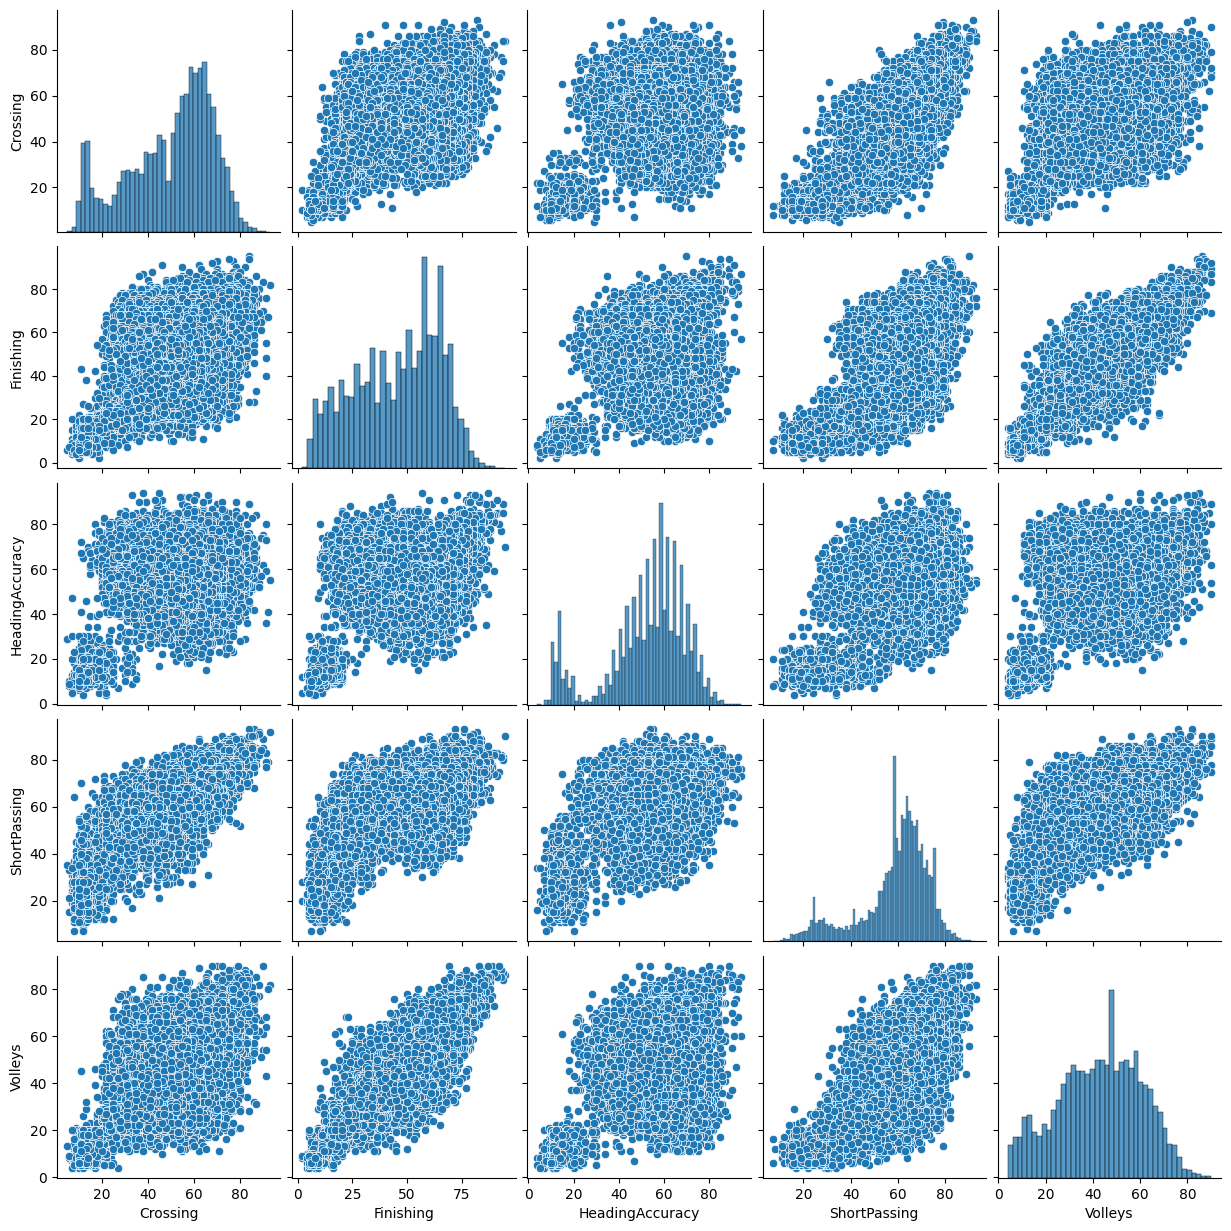

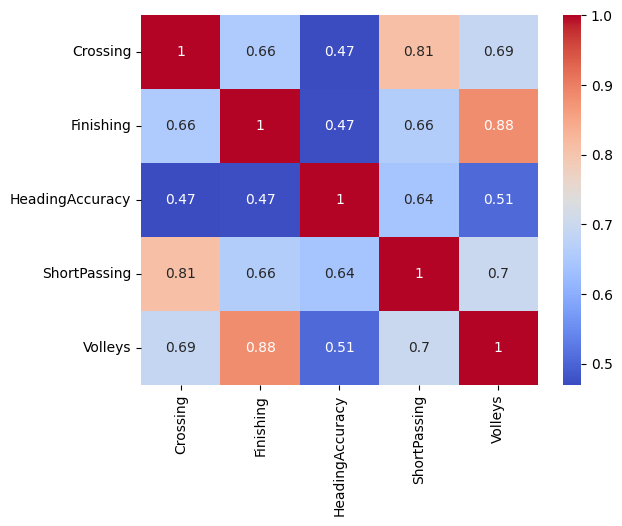

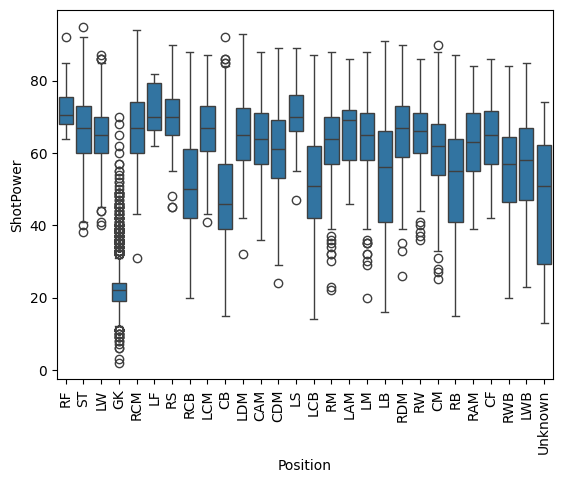

In [24]:

attributes = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys']
sns.pairplot(df[attributes])
plt.show()

correlation_matrix = df[attributes].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

sns.boxplot(x='Position', y='ShotPower', data=df)
plt.xticks(rotation=90)
plt.show()


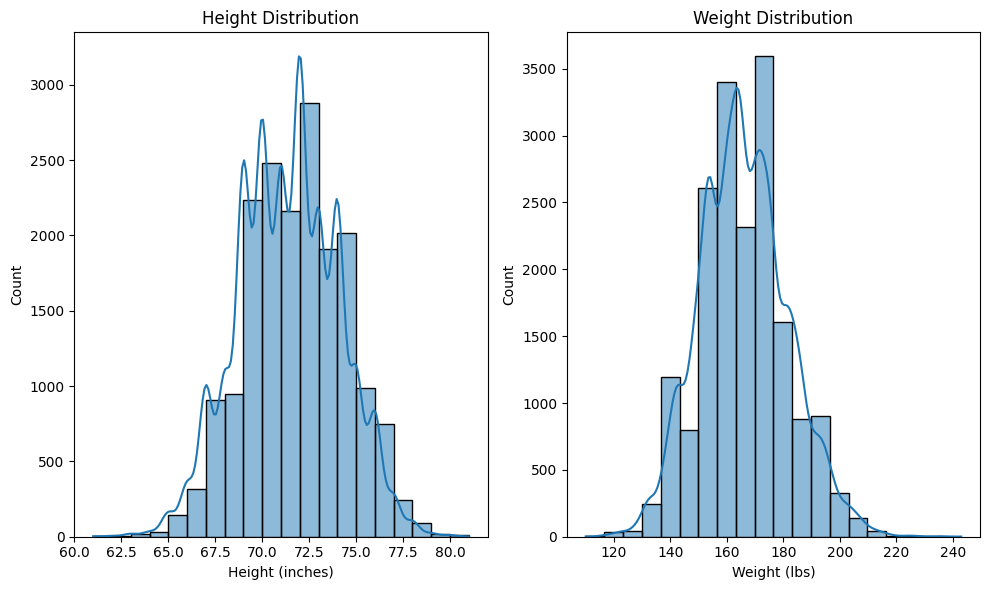

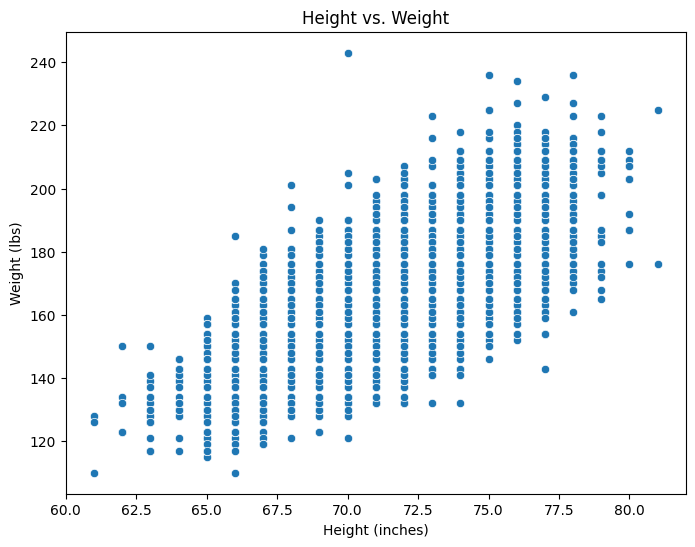

In [25]:
# Remove rows with missing 'Height' or 'Weight'
df = df.dropna(subset=['Height', 'Weight'])

# Convert 'Height' to inches and 'Weight' to pounds
df['Height_in_inches'] = df['Height'].apply(lambda x: int(x.split("'")[0]) * 12 + int(x.split("'")[1]))
df['Weight_in_lbs'] = df['Weight'].apply(lambda x: int(x.split("lbs")[0]))

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Height_in_inches'], bins=20, kde=True)
plt.xlabel('Height (inches)')
plt.title('Height Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Weight_in_lbs'], bins=20, kde=True)
plt.xlabel('Weight (lbs)')
plt.title('Weight Distribution')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height_in_inches', y='Weight_in_lbs', data=df)
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.title('Height vs. Weight')
plt.show()


C:\Users\prakh\AppData\Local\Temp\ipykernel_15980\1491173702.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


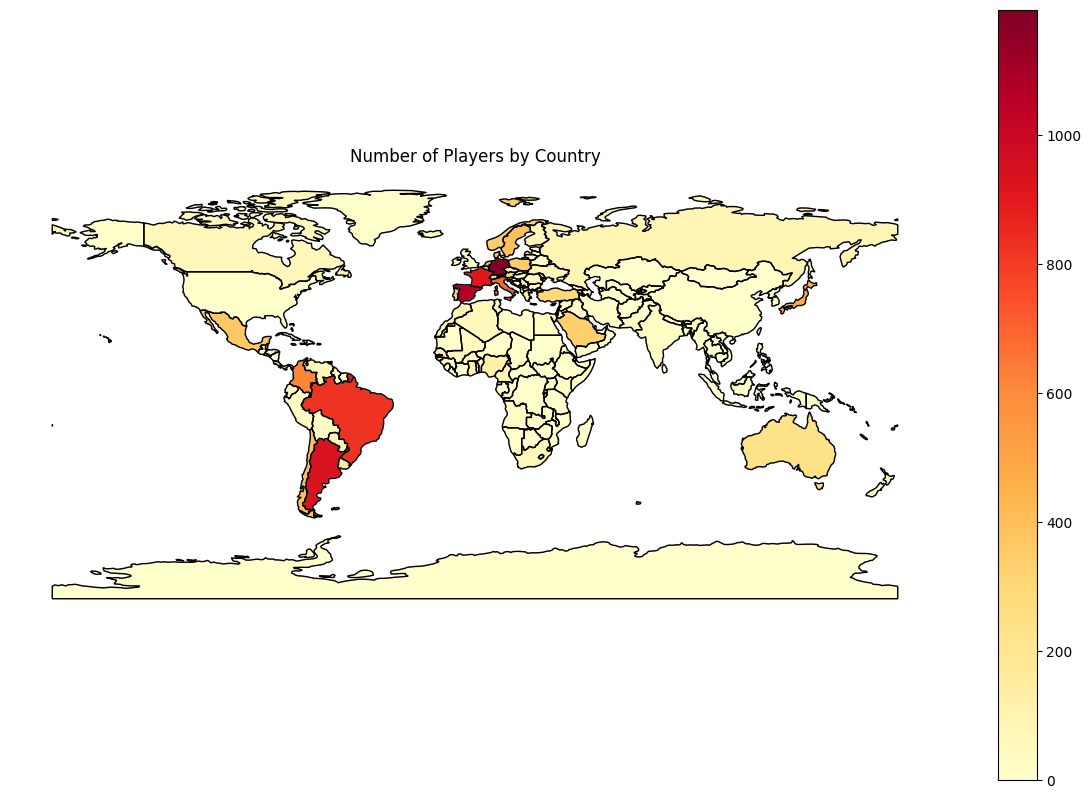

In [28]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

country_counts = df['Nationality'].value_counts().reset_index()
country_counts.columns = ['country', 'player_count']

world['country'] = world['name']
merged_data = world.set_index('country').join(country_counts.set_index('country'))

merged_data['player_count'].fillna(0, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.boundary.plot(ax=ax, linewidth=1, color='black')
merged_data.plot(column='player_count', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Number of Players by Country')
ax.axis('off')
plt.show()


Based on the plots above we can conclude that.
1. Most players are aged between 20 to 27, with highest being 45 and lowest 16
2. Most players have potential of around 60 an highest is 95  and lowest is 51
3. The general trend is that a players value first increases as his age increases till about 35 then his value starts to depreciate
4. About 77% of the players are right footed
5. Most players play St position
6. Avg height is around 73 inches and weight 170 pounds
7. Most players are from the south American continent